<a href="https://colab.research.google.com/github/internship-bvoc2020/MachineLearning/blob/master/ML_ModelBuilding_playbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Supervised Machine Learning 

This set of Machine Learning problems have a Target Label set present , using which Algorithm learns patterns on Training dataset and then Predicts on Test/Validation set

The set of features which are fed into the model are called *Independent variables* .The Target Label which needs to be predicted is called *Dependant Variable*

Supervised are usually classified into two kind of problem categories -

**Classification** - Where Target variable is a categorical one either being Binary (1/0 , Yes/No) or MultiClass [0,1,2] , [Yes/No/Maybe] 

**Regression** - Where Target variable is a real value or a probability that needs to be predicted e.g - Students final score 

Algorithms used for solving these problems are of the following kind -

1. Linear Models - includes Linear Regression , Logistic Regression (Classification) , Lasso Regression etc

2. Kernel Models - Support Vector Machine ,Principal Component Analysis etc

3. Trees based Models - Decision Trees , Random Forest , Gradient Boosting ,Bagging techniques

4. Neural Networks

### Unsupervised Machine Learning

This involves drawing inferences from datasets consisting of input data without labeled (Target Label) responses.

Techniques used over here are Clustering approaches (KNN, Hierarchical ,DBScan etc)  and Association Rules



### Semi Supervised Machine Learning

This branch deals with problems having datasets which are labelled in small proportion.Requires combination of bother supervised & unsupervised techniques in solving the problem

Few techniques used are :  Label Propagation , Active Learning etc

**Supervised Machine Learn - Classification Modeling**

Build a model to predict which Loan Applications will be Accepted or Rejected . 

*'Loan_Status*' in the below dataset defines the application being accepted or not based on Applicants Demographic details captured in the dataset 

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_data = pd.read_csv("dataset_model.csv",sep=",")
df_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
df_data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [0]:
df_data.columns

In [0]:
df_data.shape

(614, 13)

In [0]:
df_data['Loan_Status'].unique()


### Identifying Potential Features in a dataset

When given a dataset , here a labelled one with Laon_Status being the Target Label/Dependent Label , rest of the fields become potential Independent Labels or Features.

From the "potenital" list of features , we first check if any Primary Key record identification fields are present which were created only for Identification purposes.Such fields are removed from Features list as they have no usage in predicting Target Label.Ex - Aadhar card , PAN no , Name etc 

Here 'Loan_ID' seems to be a unique record identification field , which doesn't seem to capture any information about the applicant.


In [0]:
#Checking if Loan ID has all unique values , and thus can be removed 
len(df_data['Loan_ID'].unique())

In [6]:
#Saving the Loan ID in the sequence of application in another dataframe
df_id = df_data['Loan_ID']
#Dropping Loan ID from Featureset
df_data=df_data.drop(columns='Loan_ID')
df_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Target variables in Classification problems , if they're not numeric then they are always encoded using Label Encoder. This is to ensure that either the Binary Class(0/1) or Multi-Class (0/1/2..) is clearly understood by Model and use this information in Featureset to perform prediction.

Also , if there are records which have Target Variables as missing , then they are  removed from Training set . No missing values treatment is done 


## Performing EDA & Feature Engineering on dataset


**Continous Columns**

In [7]:
num_cols = df_data._get_numeric_data().columns
cont_cols = []
for i in num_cols:
  if(len(df_data[i].unique())) > int(df_data.shape[0]/25):
     cont_cols.append(i)
print (cont_cols)  

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


**Categorical Columns**

In [8]:
cat_cols = list(set(df_data.columns) - set(cont_cols))
cat_cols

['Credit_History',
 'Loan_Amount_Term',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Dependents',
 'Gender',
 'Married']

### Outlier Treatment for Continous Variables 

**Approaches**

1.   Flooring & Capping the Outliers using Quantiles
2.   Transformations - Logarithmic or Square Root

1.   Replacement using Median Values
2.   Removing the Outliers using IQR/Confidence Intervals






**Check Skewness & Data Distribution**

In [0]:
#Check Skewness
for i in cont_cols:
  print(str(i)+' : '+str(df_data[i].skew()))

ApplicantIncome : 6.539513113994625
CoapplicantIncome : 7.491531216657306
LoanAmount : 2.677551679256059


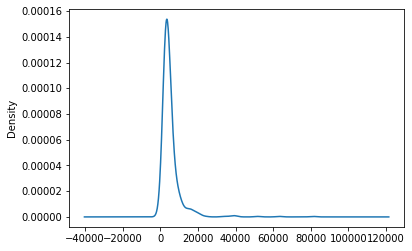

In [0]:
df_data['ApplicantIncome'].plot.kde()

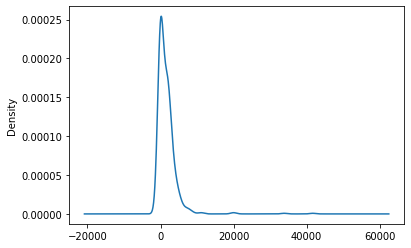

In [0]:
df_data['CoapplicantIncome'].plot.kde()

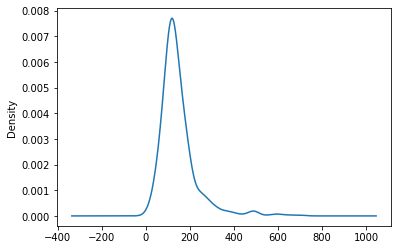

In [0]:
df_data['LoanAmount'].plot.kde()

**Outlier Handling using Quantile based capping**

In [9]:
#Using Quantile flooring  at 5% & 95%
for i in cont_cols:
  #Defning the lower & upper cap/cutoff
  lower_cutoff = df_data[i].quantile(0.05)
  upper_cutoff = df_data[i].quantile(0.95)
  #Replacing the Outliers from both ends with capped cutoffs
  df_data[i] = np.where(df_data[i] < lower_cutoff,lower_cutoff,df_data[i])
  df_data[i] = np.where(df_data[i] > upper_cutoff, upper_cutoff,df_data[i])
  print('Revised skew after Outlier handling '+str(i)+' : '+str(df_data[i].skew()))

Revised skew after Outlier handling ApplicantIncome : 1.7637799807028802
Revised skew after Outlier handling CoapplicantIncome : 0.8452039718003408
Revised skew after Outlier handling LoanAmount : 1.0594654991821644


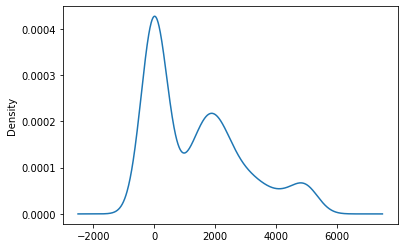

In [0]:
df_data['CoapplicantIncome'].plot.kde()

### Performing Log Transformation for Outlier Treatment

-0.17295088273888753


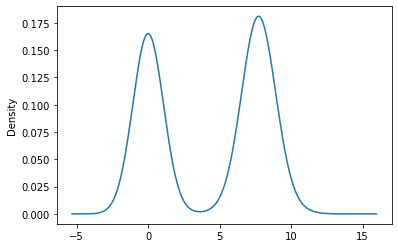

In [0]:
df_data["Log_CoapplicantIncome"] = df_data["CoapplicantIncome"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df_data['Log_CoapplicantIncome'].skew())
df_data['Log_CoapplicantIncome'].plot.kde()

In [0]:
#df_data = df_data.drop(columns=["Log_CoapplicantIncome"])
df_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Log_CoapplicantIncome'],
      dtype='object')

###  Handling Missing Data

In [10]:
#Missing Features
#Remove a column when populated < 50%
mis_data =pd.DataFrame(df_data.count(axis=0)).reset_index()
mis_data.columns =["Feature","Total_Populated"]
mis_data =mis_data[(mis_data['Total_Populated'] < df_data.shape[0])]
mis_data

,Feature,Total_Populated
0,Gender,601
1,Married,611
2,Dependents,599
4,Self_Employed,582
7,LoanAmount,592
8,Loan_Amount_Term,600
9,Credit_History,564


### Sparsity of Records

In [0]:
#Checking Sparse rows , if >= 33.3% of columns of a record is not populated then remove the record itself
# Found no record Sparsely populated
rows_missing = df_data.isnull().sum(axis=1).reset_index() 
rows_missing.columns = ['row','mis_cnt']
rows_missing[(rows_missing['mis_cnt'] > int(df_data.shape[1]/3))]

,row,mis_cnt


###  Missing values Imputation - Approaches

1. Categorical with Mode , Continous with Median or Mean (if Outliers are handled)

2. Use the previous or next value for the column ( Pandas .fillna *method* -{ffill ,bfill}) *when data shows a trend*

3. Utilize other fields to derive the value.Observations via bi-variate, multivariate analysis 
4.Impute(Categorical data only) an unseen/dummy constant value : -99 or 100000000 ,'aaaa', 'xyzxyz'


**Populate the Missing values in Categorical columns with Mode value**

In [0]:
#Mode value for every field
df_data.mode().iloc[0]

Gender                        Male
Married                        Yes
Dependents                       0
Education                 Graduate
Self_Employed                   No
ApplicantIncome              14583
CoapplicantIncome                0
LoanAmount                      56
Loan_Amount_Term               360
Credit_History                   1
Property_Area            Semiurban
Loan_Status                      Y
Log_CoapplicantIncome            0
Name: 0, dtype: object

In [0]:
#Categorical Columns with missing values
df_data[cat_cols].isnull().sum()

Married              3
Loan_Amount_Term    14
Loan_Status          0
Education            0
Gender              13
Dependents          15
Self_Employed       32
Credit_History      50
Property_Area        0
dtype: int64

In [0]:
#Populating Categorical with Mode
for cols in cat_cols:
  if ( df_data[cols].isnull().sum() > 0):
    df_data[cols] = df_data[cols].fillna(df_data[cols].mode().iloc[0])

In [0]:
#Checking for missing values post Mode imputation
df_data[cat_cols].isnull().sum()

Married             0
Loan_Amount_Term    0
Loan_Status         0
Education           0
Gender              0
Dependents          0
Self_Employed       0
Credit_History      0
Property_Area       0
dtype: int64

**Populate the Missing Values in Continous Columns value with Median**

In [0]:
df_data.median()

ApplicantIncome          3812.500000
CoapplicantIncome        1188.500000
LoanAmount                128.000000
Loan_Amount_Term          360.000000
Credit_History              1.000000
Log_CoapplicantIncome       7.080284
dtype: float64

In [0]:
#Check which of continous columns have missing value
df_data[cont_cols].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
dtype: int64

In [0]:
#Populate Continous with Median
for cols in cont_cols:
  if ( df_data[cols].isnull().sum() > 0):
    df_data[cols] = df_data[cols].fillna(df_data[cols].median())

In [0]:
#Check which of continous columns have missing value
df_data[cont_cols].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

In [0]:
df_data.shape

(614, 13)

### Encoding of Data

**Splitting across the Target variable & Label Encode**

In [0]:
df_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Log_CoapplicantIncome'],
      dtype='object')

In [13]:
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(df_data['Loan_Status']))
df_target.columns = (['Loan_Status'])
df_target.head()


,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [0]:
print(df_target['Loan_Status'].value_counts())
lbl_1,lbl_0 = df_target['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/df_target['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/df_target['Loan_Status'].count()))

1    422
0    192
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.72964169381108
Label 0 class %age: 31.270358306188925


In [46]:
df_data=df_data.drop(columns='Loan_Status')
df_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

### Label Encode the Categorical Columns

In [0]:
df_le = df_data.copy()

In [48]:
cat_cols = list(set(cat_cols) - set(['Loan_Status']))
cat_cols

['Credit_History',
 'Loan_Amount_Term',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Dependents',
 'Gender',
 'Married']

In [0]:
for j in cat_cols :
  df_le['enc_'+str(j)] = le.fit_transform(df_le[j])
df_loan_le = df_le.drop(columns = cat_cols)
df_loan_le.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Log_CoapplicantIncome,enc_Married,enc_Loan_Amount_Term,enc_Education,enc_Gender,enc_Dependents,enc_Self_Employed,enc_Credit_History,enc_Property_Area
0,5849.0,0.0,128.0,0.000000,0,8,0,1,0,0,1,2
1,4583.0,1508.0,128.0,7.318540,1,8,0,1,1,0,1,0
2,3000.0,0.0,66.0,0.000000,1,8,0,1,0,1,1,2
3,2583.0,2358.0,120.0,7.765569,1,8,1,1,0,0,1,2
4,6000.0,0.0,141.0,0.000000,0,8,0,1,0,0,1,2


In [0]:
df_loan_le.shape

(614, 12)

### OHE Categorical Columns

In [0]:
df_ohe = df_data.copy()

In [50]:
cat_cols

['Credit_History',
 'Loan_Amount_Term',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Dependents',
 'Gender',
 'Married']

In [51]:
for j in cat_cols :
   df_ohe = pd.get_dummies(df_ohe, columns=[j], prefix=[j] )
df_ohe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History_0.0,Credit_History_1.0,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Gender_Female,Gender_Male,Married_No,Married_Yes
0,5849.0,0.0,128.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0
1,4583.0,1508.0,128.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1
2,3000.0,0.0,66.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1
3,2583.0,2358.0,120.0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1
4,6000.0,0.0,141.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0


In [34]:
df_ohe.shape

(614, 31)

### Train Test Split

Used to Split the Training dataset into Training the model & Testing the model

Stratified Sampling : proportion of classes (0/1) in Training & Testing sets is maintained w.r.t that present in actual dataset 

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df_ohe, df_target, test_size=0.25, random_state=42 , stratify=df_target)

In [112]:
print("Train Feature set:\t"+str(len(X_train)))
print("Train Label Feature set:\t"+str(len(Y_train)))
print("Test Feature set:\t"+str(len(X_test)))
print("Test label set:\t"+str(len(Y_test)))

Train Feature set:	460
Train Label Feature set:	460
Test Feature set:	154
Test label set:	154


In [113]:
#Stratified Sampling
print("For Training Data :")
print(Y_train['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_train['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_train['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_train['Loan_Status'].count()))
print("\nFor Test Set :")
print(Y_test['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_test['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_test['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_test['Loan_Status'].count()))

For Training Data :
1    316
0    144
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.69565217391305
Label 0 class %age: 31.304347826086957

For Test Set :
1    106
0     48
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.83116883116882
Label 0 class %age: 31.16883116883117


### Decision Tree Classification Model run using GridSearch

(https://scikit-learn.org/stable/modules/tree.html)

Parameters to be fed , if not mentioned are taken as default

Hyperparameter tuning can be done  using: *GridSearch CV or RandomSearchCV*

In [121]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, Y_train)
print(clf_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


In [122]:
y_pred = clf_dt.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Metrics of Evaluation

**Confusion Matrix** : 


([TN , FP ]

 [FN , TP ])


**Accuracy** : How many predictions ( 0 or 1) were correctly predicted by the model on the overall test set

**Precision** : This metric informs that for Label class 1 predicted by model , how many were correctly predicted : TP/(TP+FP)

**Recall** : Tells us how many of the Actual Label 1 cases were covered by model : TP /(TP +FN)

Tradeoff between Recall & Precision generally observed in models

**F1 Score** : A score provifing balance between Recall & Prediction : 2 *(Precision * Recall)/(Precision+ Recall)

More details : https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9



In [127]:
#Using Dtree without Gridsearch
print("----Parameter tuning without GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred))



----Parameter tuning without GridSearch-----
Confusion Matrix
[[31 17]
 [20 86]]
Accuracy of Dtree Model:
0.7597402597402597
Precision of DTree Model:
0.8349514563106796
Recall of DTree Model:
0.8113207547169812
F1 Score of DTree Model:
0.8229665071770335


### *GridSearchCV* 

Thismodule performs exhaustive search over specified parameter values for an estimator , by evaluating all combinations

Implements a “fit” , “predict” methods , similar to models and uses Cross Validation approach. (https://scikit-learn.org/stable/modules/cross_validation.html) for  

Details on GridSearch : 
(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [129]:
#Using GridSearch , find the optimal hyperparameters

clf_dt = DecisionTreeClassifier()
param_grid = {
   'max_leaf_nodes': [  10, 20,2, 5, 50 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'] ,
   'max_depth' : [ 30, 20, 75, 50, 100 ],
   'min_samples_split': [ 2, 3, 4]
    }
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, Y_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [130]:
#Using Gridsearch optimal parameter tuning
print("----Parameter tuning using GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred))

----Parameter tuning using GridSearch-----
Confusion Matrix
[[ 27  21]
 [  1 105]]
Accuracy of Dtree Model:
0.8571428571428571
Precision of DTree Model:
0.8333333333333334
Recall of DTree Model:
0.9905660377358491
F1 Score of DTree Model:
0.9051724137931034


In [131]:
roc_auc_score(Y_test,y_pred)

0.7765330188679245

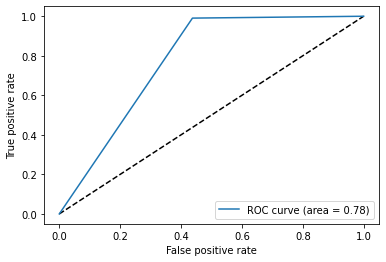

In [120]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')